## Exercise in Photogrammetry II
# Ex. 06 Orthophoto
### Submission: 29.01.2021 
### Points: 12


In this exercise you need to construct the orthophoto given a regular, tilted image. 
We provide you the image `image.rect.jpg` as well as orientation data in form of projection matrix P in the file `P.mat` and Digital Surface Model (DSM) in file `Z.mat`. 
The image coordinate system is a left handed system with the origin in the upper left corner of the image.

The DSM is given as matrix where for every point $(x, y)$ corresponds to the value of the height z. The origin of the object coordinate system lies in the left bottom corner. 
The distance in point space corresponds to the grid of $1\times1 \,mm$ in object space. The x-axis increases to the right.


1. Read in the data (image,DSM,P) and *visualize* the DSM model (e.g. `plot_surface(...)`) and the image. Label the axes of both plots. (1 Point)
2. Create the orthophoto from the given image and Digital Surface Model.
We neglect the interpolation of orthophoto points in DSM and creating the orthophoto of the same dimensions as DSM so that every point of the DSM corresponds to the pixel in the orthophoto. 
For every point $(X,Y)$ of the orthophoto perform the following steps (6 Points):
    - Get the height z, so that the point in the object space is $X=[x,y,z,1]^T$
    - Compute the image pixel in the given image by projecting $X$ through $P$
    - Estimate the color of the pixel in the orthophoto (nearest neighbor).
3. Visualize the orthophoto next to the input image. Make sure that both images are in a lefthanded image coordinate system. (1 Point)
4. {Text} Which errors typically occur in orthophotos? Provide for each error a brief explanation and an example from the orthophoto of task 3. (4 Points)

**WARNING:** Be aware that the coordinates of the DSM are coordinates in the right handed system, where the origin lies in the lower left corner.

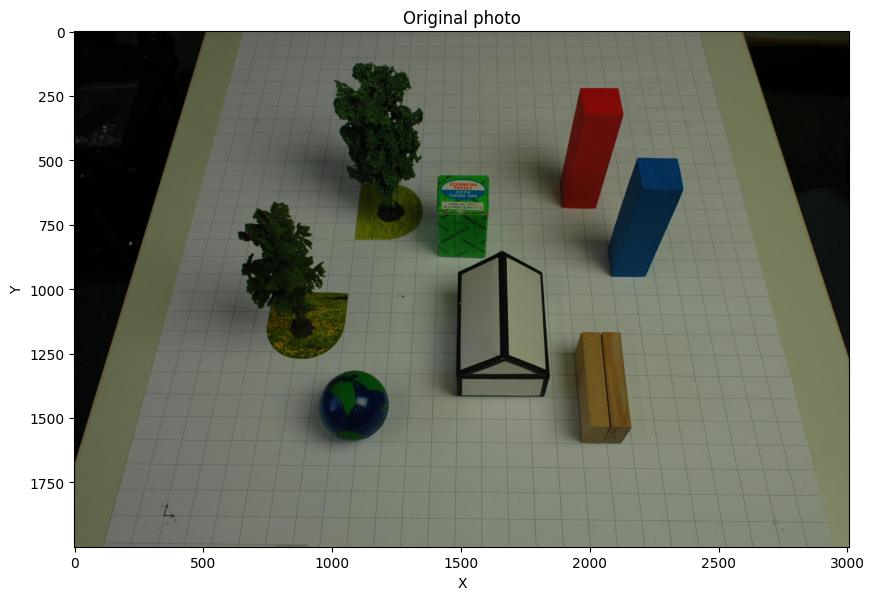

In [1]:
import matplotlib.image
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load projection matrix, photo and the DSM data.
photo = matplotlib.image.imread("data_ex15/image.rect.jpg")
P = scipy.io.loadmat("data_ex15/P.mat")["P"]
DSM = scipy.io.loadmat("data_ex15/Z.mat")["Z"]

# Show the photo.
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.imshow(photo)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Original photo')
plt.show()

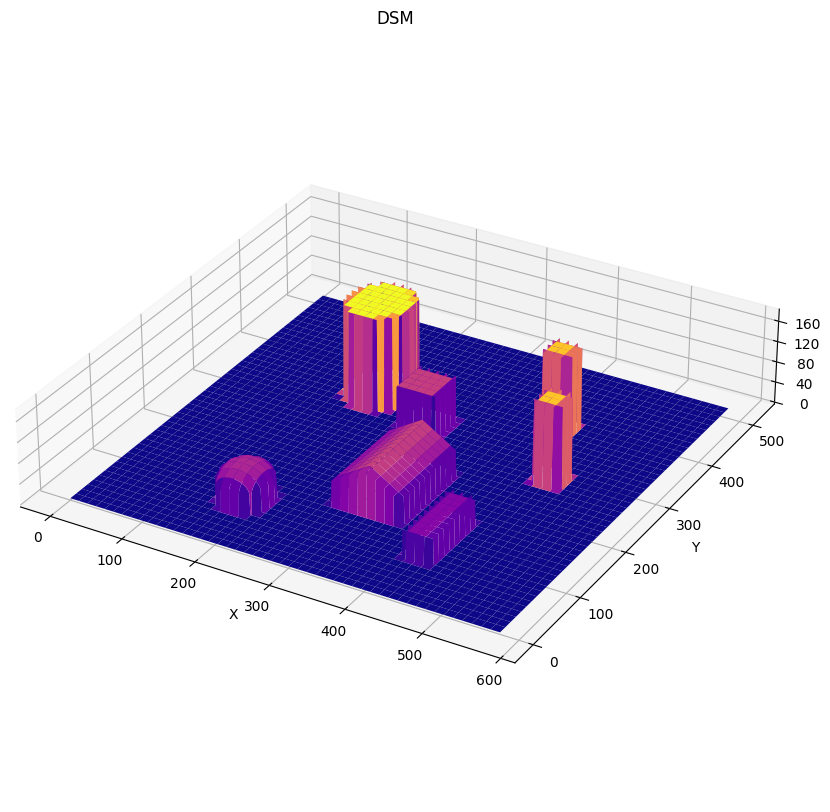

In [2]:
DSM_x = np.arange(0, DSM.shape[1])
DSM_y = np.arange(0, DSM.shape[0])
DSM_x, DSM_y = np.meshgrid(DSM_x, DSM_y)

# Visualize the DSM.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (10, 10))
ax.plot_surface(DSM_x, DSM_y, DSM, cmap='plasma')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([1, 1, 0.2]) # Manually set the box aspect ratio.
ax.zaxis.set_major_locator(plt.MaxNLocator(5)) # Reduce the number of gridlines.
ax.set_title('DSM')
plt.show()

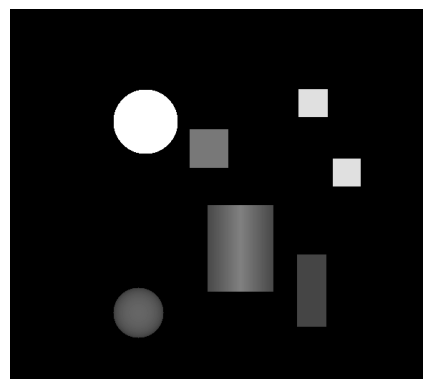

In [3]:
# Create a matrix out of the DSM.
DSM_matrix = np.copy(DSM)
DSM_matrix = np.flipud(DSM_matrix)
plt.imshow(DSM_matrix, cmap='gray')
plt.axis('off')
plt.plot()
plt.show()

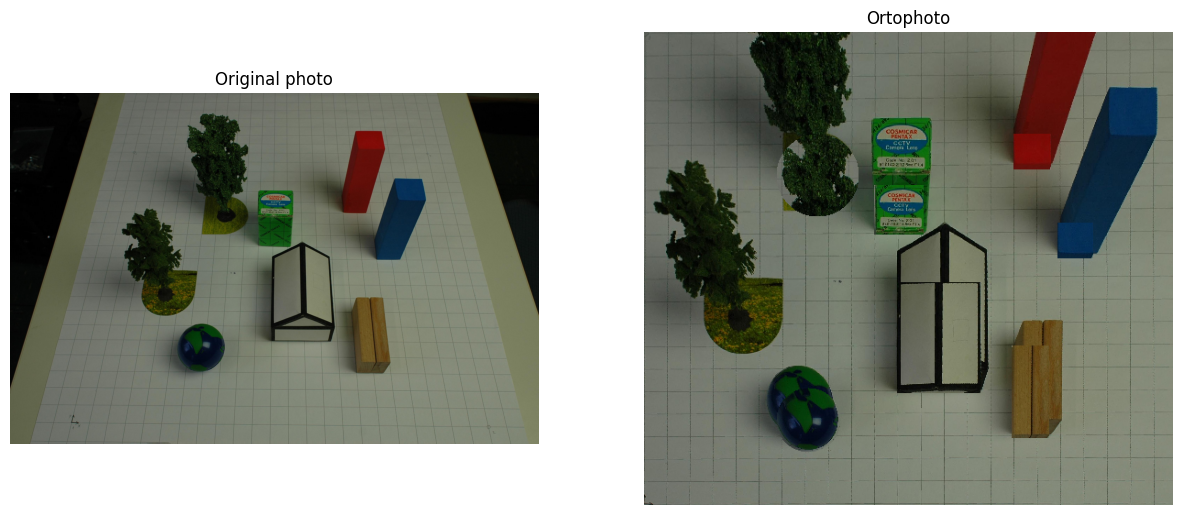

In [5]:
def project_to_pixel(x, y, z, projection_matrix):
    
    point = np.array([x, y, z, 1])
    pixel = projection_matrix @ point
    pixel = pixel[:2] / pixel[2]
    
    return pixel

def get_color(x, y, image):

    return image[x, y]

# Allocate ortophoto with dimensions of DSM.
ortophoto = np.zeros((DSM.shape[0], DSM.shape[1], 3))

# For every pixel in the heightmap.
for row in range(DSM.shape[0]):
    for column in range(DSM.shape[1]):
        
        # Find color for the ortophoto pixel.
        pixel_loc = project_to_pixel(column, row, DSM[row][column], P)
        photo_row, photo_col = round(pixel_loc[0]), round(pixel_loc[1])
        ortophoto[row, column] = get_color(photo_row, photo_col, photo)
        
# All calculations were upside-down due to DSM having pivot in lower-left cornet, so flip our result.
ortophoto = np.flipud(ortophoto)

# Show ortophoto next to original photo.
fig, ax = plt.subplots(1, 2, figsize = (15, 15))
ax[0].imshow(photo)
ax[0].set_title('Original photo')
ax[0].axis('off')
ax[1].imshow(ortophoto / 255.0)
ax[1].set_title('Ortophoto')
ax[1].axis('off')
plt.show()

There's two notable issues.

1. Main issue being innacuracy in DSM map. We can see that DSM didn't have one of the tree's height info, and thus the tree is flat.
2. Another issue is lack of information of what's "behind" the object. We can see the "shadow" behind the tall structures.